In [3]:
using Printf
using Statistics


#using Pkg
#Pkg.add("RDatasets")

### Hello world!

In [ ]:
println("hello world")

### Let's compare the execution time right away

In [ ]:
function n_primes(n::Int64)
    primes = Int64[]
    i::Int64 = 2
    while size(primes)[1] < n
        prime_bool::Bool = true
        for j = 2:i÷2
            if i%j == 0
                prime_bool = false
            end
        end
        if prime_bool == true
              append!(primes,i)
        end
        i += 1
    end
    return primes
end


In [ ]:
@time n_primes(10000)

### Syntax

You can pass the specification of multiplication between a number and a variable:

In [ ]:
x = 5+8
2x - 3x + 2x^2

Complex values are here:

In [ ]:
y = (2-1im)*(4+3im)

Julia has the ability to manage the internal presentation of data:

- typeof(obj) — Object type
- typemax(obj) — The maximum number of this type
- typemin(obj) — Minimal
- eps() — Machine zero
- BigInt — Big integer
- BigFloat — Big floating point

In [ ]:
typeof(y) 

In [ ]:
eps()

### Accuracy limitations

In [ ]:
b = 1.1111111111111111
println(b + 1.1111111111111111)

BigInt(77777777777777777777777777777777777777777)

BigFloat(2.3^45/6)
BigFloat(0.777777777777777777777777777777777777777) # We can see, where precision star to fall

Allows to use Unicode:

In [2]:
function sphere_vol(β)
    α = 4/3
    return α*π*β^3
end

sphere_vol(3)

113.09733552923254

Functions can also be defined more succinctly

In [3]:
quadratic(a, sqr_term, b) = (-b + sqr_term) / 2a

quadratic(5, 20, 6)

1.4

**@printf** allows number formatting but does not automatically append the \n to statements

In [4]:
using Printf


vol = sphere_vol(3)

@printf "volume = %0.3f\n" vol 

volume = 113.097


### Arrays

- **Array{T}(undef, dims...)** — Array of type *Т* and dimension *dims*


- **zeros(T, dims...)** — Array of zeros


- **ones(T, dims...)** — or ones

Indexing starts from **one**!

In [ ]:
A = [1 2 4; 88 5 4; 7 8 9]
A[2:3]

In [ ]:
m1 = rand(3,2)
m2 = reshape(1:2:11, 3,2)

In [ ]:
for i in eachindex(A) # like enumerate(A) in python 
    println(i)
   
end 

### Multidimensional Arrays

In [ ]:
zeros(Int8, 2, 3)

In [8]:
promote(1, 2.3, 4//5) # This combination of Int, Float64 and Rational promotes to Float64


m1 = hcat(repeat([1,2],inner=[1],outer=[3*2]),
          repeat([1,2,3],inner=[2],outer=[2]),
          repeat([1,2,3,4],inner=[3],outer=[1]))
print(m1)

[1 1 1; 2 1 1; 1 2 1; 2 2 2; 1 3 2; 2 3 2; 1 1 3; 2 1 3; 1 2 3; 2 2 4; 1 3 4; 2 3 4]

In [ ]:
[1:2, 4:5] # Concatenation

In [ ]:
[1:2 4:5]

### Debugging

In [ ]:
function func(a, b)
    return a*b
end

func([1,2,3],[4,5,6])

Julia and its package ecosystem includes tools that may help you diagnose problems and improve the performance of code:

1. A macro to evaluate an expression, discarding the resulting value, instead returning the total number of bytes allocated during evaluation of the expression.

In [7]:
@allocated n_primes(10000)

LoadError: UndefVarError: n_primes not defined

Evaluates the arguments to the function or macro call, determines their types, and calls code_warntype on the resulting expression.

In [8]:
@code_warntype n_primes(10000)

LoadError: UndefVarError: n_primes not defined

### Graphs!

- Pkg.add("Plots")


- Pkg.add("PyPlot") - the most popular


- Pkg.add("Gadfly")


- Pkg.add("Winston")

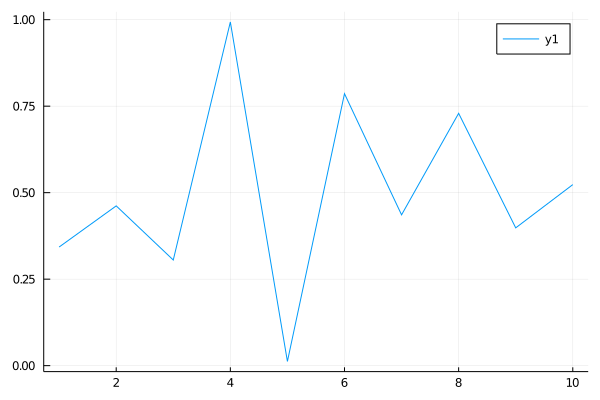

In [1]:
using Plots
x = 1:10; y = rand(10); # These are the plotting data
plot(x, y)

In [ ]:
x = 1:10; y = rand(10, 2) # 2 columns means two lines
p = plot(x, y)
z = rand(10)
plot!(p, x, z)

In [ ]:
using Plots
# define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x);         l.x += l.dt * dx
    dy = l.x * (l.ρ - l.z) - l.y;   l.y += l.dt * dy
    dz = l.x * l.y - l.β * l.z;     l.z += l.dt * dz
end

attractor = Lorenz()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-30, 30),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 2,
)

# build an animated gif by pushing new points to the plot, saving every 10th frame
@gif for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end every 10

In [ ]:
using Plots
default(legend = false)
x = y = range(-5, 5, length = 40)
zs = zeros(0, 40)
n = 100

@gif for i in range(0, stop = 2π, length = n)
    f(x, y) = sin(x + 10sin(i)) + cos(y)

    # create a plot with 3 subplots and a custom layout
    l = @layout [a{0.7w} b; c{0.2h}]
    p = plot(x, y, f, st = [:surface, :contourf], layout = l)

    # induce a slight oscillating camera angle sweep, in degrees (azimuth, altitude)
    plot!(p[1], camera = (10 * (1 + cos(i)), 40))

    # add a tracking line
    fixed_x = zeros(40)
    z = map(f, fixed_x, y)
    plot!(p[1], fixed_x, y, z, line = (:black, 5, 0.2))
    vline!(p[2], [0], line = (:black, 5))

    # add to and show the tracked values over time
    global zs = vcat(zs, z')
    plot!(p[3], zs, alpha = 0.2, palette = cgrad(:blues).colors)
end

In [ ]:
# load a dataset
using RDatasets
iris = dataset("datasets", "iris");

# load the StatsPlots recipes (for DataFrames) available via:
# Pkg.add("StatsPlots")
using StatsPlots

# Scatter plot with some custom settings
@df iris scatter(
    :SepalLength,
    :SepalWidth,
    group = :Species,
    title = "My awesome plot",
    xlabel = "Length",
    ylabel = "Width",
    m = (0.5, [:cross :hex :star7], 12),
    bg = RGB(0.2, 0.2, 0.2)
)

In [ ]:
using GraphRecipes
using Plots

const n = 15
const A = Float64[ rand() < 0.5 ? 0 : rand() for i=1:n, j=1:n]
for i=1:n
    A[i, 1:i-1] = A[1:i-1, i]
    A[i, i] = 0
end

graphplot(A,
          markersize = 0.2,
          node_weights = 1:n,
          markercolor = range(colorant"yellow", stop=colorant"red", length=n),
          names = 1:n,
          fontsize = 10,
          linecolor = :darkgrey
          )

### Parallel Computing

#### Multi-Threading

In [ ]:
#Threads.nthreads()

#--threads 4

#Threads.threadid() # Check on with thread we are

#### The @threads Macro

Let's work a simple example using our native threads.

Let us operate on this array simultaneously using 4 threads. We'll have each thread write its thread ID into each location.

Julia supports parallel loops using the Threads.@threads macro. **This macro is affixed in front of a for loop** to indicate to Julia that the loop is a multi-threaded region:

In [ ]:
a = zeros(10)

Threads.@threads for i = 1:10
    a[i] = Threads.threadid()
end

a

The iteration space is split among the threads, after which each thread writes its thread ID to its assigned locations

#### Asynchronous Programming

When a program needs to interact with the **outside world**, for example communicating with another machine over the internet, operations in the program may need to happen in an **unpredictable order**. 

Say your program needs to download a file. We would like to initiate the download operation, perform other operations while we wait for it to complete, and then resume the code that needs the downloaded file when it is available. This sort of scenario falls in the domain of **asynchronous programming**, sometimes also referred to as **concurrent programming** (since, conceptually, multiple things are happening at once).

To address these scenarios, Julia provides **Tasks** (also known by several other names, such as symmetric coroutines, lightweight threads, cooperative multitasking, or one-shot continuations). When a **piece of computing work** (in practice, executing a particular function) **is designated as a Task**, it becomes possible to interrupt it by switching to another Task

Julia provides a **Channel** mechanism for solving this problem. A Channel is a **waitable first-in first-out queue** which can have multiple tasks reading from and writing to it.

In [6]:
# > function producer(c::Channel)
#            put!(c, "start")
#            for n=1:4
#                put!(c, 2n)
#            end
#            put!(c, "stop")
#        end;

# > chnl = Channel(producer);

# > take!(chnl)

### Multi-processing and Distributed Computing

Julia's implementation of message passing is **different from other environments such as MPI**. Communication in Julia is generally **"one-sided"**, meaning that the programmer needs to explicitly manage only one process in a two-process operation. Furthermore, these operations typically do not look like "message send" and "message receive" but rather resemble higher-level operations like **calls to user functions**.

Distributed programming in Julia is built on two primitives: **remote references** and **remote calls**.

A **remote reference** is an object that can be used from any process to refer to an object stored on a particular process.

A **remote call** is a request by one process to call a certain function on certain arguments on another (possibly the same) process.

In [ ]:
./julia -p 2

Starting with **julia -p n** provides **n worker** processes on the local machine.

Generally it makes sense for n to equal the number of CPU threads (logical cores) on the machine. 

In [ ]:
# Most parallel programming in Julia does not reference specific processes or the number 
#of processes available, but remotecall is considered a low-level interface providing finer control. 

r = remotecall(rand, 2, 2, 2) # We ask process 2 to construct a 2-by-2 random matrix 
#The @spawnat macro evaluates the expression in the second argument on the process specified by the first argument.

s = @spawnat 2 1 .+ fetch(r) # Here we asked it to add 1 to it

fetch(s) # Obtain the full value of the result

Remote references come in two flavors: **Future** and **RemoteChannel**.

A remote call returns a **Future** to its result. Remote calls return immediately

### Starting and managing worker processes

Functions **addprocs**,**rmprocs**, **workers**, and others are available as a programmatic means of **adding**, **removing** and **querying** the processes in a cluster.

In [ ]:
using Distributed

addprocs(2)

- Data Movement

- Global variables

- **Shared Arrays** - Shared Arrays use system shared memory to map the same array across many processes.
